In [2]:
!pip install scikit-learn

In [1]:
#from sklearn.datasets import fetch_openml
from tensorflow import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

In [4]:
import pandas as pd
import numpy as np

In [5]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [17]:
def present_shapes(X_train,X_test, y_train, y_test):
    print("X_train",X_train.shape)
    print("X_test",X_test.shape)    
    print("y_train",y_train.shape)    
    print("y_test",y_test.shape)
    
    print("columns in Train Set",X_train.keys())
    

In [20]:
present_shapes(X_train,X_test,y_train,y_test)

X_train (60000, 784)
X_test (10000, 784)
y_train (60000,)
y_test (10000,)
columns in Train Set RangeIndex(start=0, stop=784, step=1)


In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [29]:
some_digit = X_train.iloc[0]
some_digit = np.array(some_digit)
some_digit_image = some_digit.reshape(28,28)

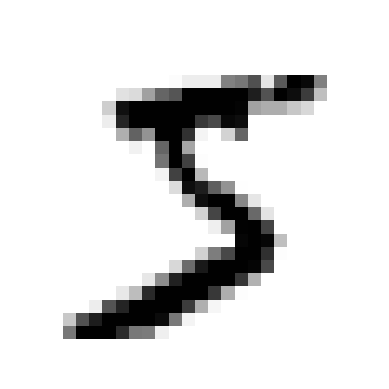

In [30]:
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [33]:
y_train[0]
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

In [34]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [41]:
some_digit = X_train.iloc[1]
some_digit = np.array(some_digit)
some_digit_image = some_digit.reshape(28,28)
sgd_clf.predict([np.array(X_train.iloc[1])])

array([False])

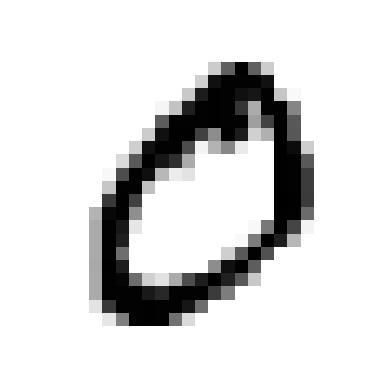

In [44]:
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [50]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [56]:
skfolds = StratifiedKFold(n_splits=3)
present_shapes(X_train,X_test,y_train,y_test)

X_train (60000, 784)
X_test (10000, 784)
y_train (60000,)
y_test (10000,)
columns in Train Set RangeIndex(start=0, stop=784, step=1)


In [67]:
for train_index, test_index in skfolds.split(X_train, y_train):
    clone_clf = clone(sgd_clf)
    print(train_index.shape)
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

(40000,)
0.87365
(40000,)
0.85835
(40000,)
0.8689


In [69]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [70]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[5635,    0,   61,   10,   16,   50,   46,    7,   66,   32],
       [   3, 6393,   95,   21,   16,   47,   15,   27,  109,   16],
       [  72,   56, 5174,   89,   69,   39,  163,   66,  212,   18],
       [  58,   32,  217, 4941,   23,  441,   32,   56,  216,  115],
       [  11,   26,   46,    6, 5298,   26,   73,   32,   87,  237],
       [  68,   23,   58,  150,   83, 4606,  174,   26,  152,   81],
       [  40,   13,   56,    6,   22,  113, 5625,    5,   36,    2],
       [  23,   24,  103,   36,  124,   40,   10, 5228,   75,  602],
       [  40,  101,  158,  122,   49,  457,   77,   35, 4666,  146],
       [  33,   18,   66,   83,  515,  127,    4,  485,  166, 4452]])

In [81]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred,average=None)

array([0.9418352 , 0.95617709, 0.85747431, 0.90428258, 0.85245374,
       0.77463841, 0.90448625, 0.87615217, 0.80656871, 0.78091563])

In [82]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3,
method="predict_proba")